<a href="https://colab.research.google.com/github/sharique-ansari/ScientificComputing/blob/master/scmpHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla
import math
import pylab
from numpy import linalg as LA
import pprint
import scipy
import scipy.linalg

In [0]:
def hilbert(n):
    output=np.zeros((n,n), dtype=float)
    for i in range(n):
        for j in range(n):
            temp=math.pow((i+j+1),-1)
            output[i][j] = temp
    return output


Input below a value of n

In [0]:
n = int(input())
def solve(n):
  h = hilbert(n)
  x = np.ones((n,1), dtype=int)

  b = np.dot(h, x)
  PL, U = scipy.linalg.lu(h, True)
  yvalues = np.linalg.solve(PL,b)
  xvalues = np.linalg.solve(U,yvalues)

  


  dx = xvalues - x


  r = b - (np.dot(h, xvalues))
  print (f"inf-norm of r: {LA.norm(r,np.inf)}")


  print (f"inf-norm of dX: {LA.norm(dx,np.inf)}")
solve(n)


14
inf-norm of r: 4.440892098500626e-16
inf-norm of dX: 8.899732478195734


For n =17 we get infinity norm of dx as 17.86 and this ratio is closest to one and after this error increases. So we can make n as large as 17 before starting to get significant error

#Solutions to question 2

In [0]:
evalues = np.geomspace(1e-2, 1e-20, num=10)

##Part A

In [0]:
output = []
for e in evalues:
  a = np.array([[e, 1], [1, 1]])
  b = np.array([e+1, 2])
  L = np.array([[1,0],[1/e, 1]])
  U = np.array([[e,1],[0,1-(1/e)]])

  yvalues = np.linalg.solve(L, b)
  xvalues = np.linalg.solve(U,yvalues)
  output.append(xvalues-[1,1])
errorarr = [abs(i[0])+abs(i[1]) for i in output]
print(errorarr)






[8.881784197001252e-16, 1.1013412404281553e-13, 8.22666379463044e-11, 6.07747097092215e-09, 8.274037099909037e-08, 0.00013314402258424174, 0.0007992778373591136, 1.2204460492503133, 1.0, 1.0]


Plotting values of e and absolute combined error with logarithmic scaling

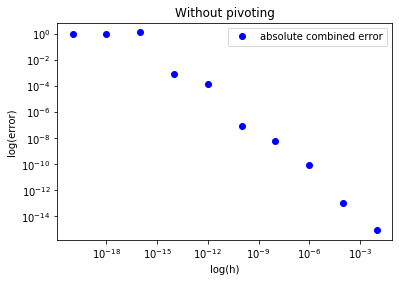

In [0]:
pylab.loglog(evalues,errorarr,'bo',label = "absolute combined error")
pylab.legend(loc='upper right')
pylab.ylabel("log(error)")
pylab.xlabel("log(h)")
pylab.title('Without pivoting')
pylab.show()


As e decreases the infinity norm of error increases, Or error increases as e decreases.

##Part B

In [0]:
output = []
for e in evalues:
  a= np.array([[e,1],[1,1]])
  b = np.array([e+1,2])
  PL,U = sp.linalg.lu(a,True)
  yvalues = np.linalg.solve(PL,b)
  xvalues = np.linalg.solve(U,yvalues)
  output.append(xvalues-[1,1])
errorarr = [abs(i[0])+abs(i[1]) for i in output]
print(errorarr)


[0.0, 0.0, 0.0, 0.0, 0.0, 4.440892098500626e-16, 0.0, 1.1102230246251565e-16, 0.0, 0.0]


Plotting log(e) values versus error values 

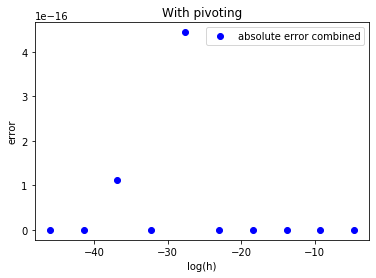

In [0]:
pylab.plot(np.log(evalues),errorarr,'bo',label = "absolute error combined")
pylab.legend(loc='upper right')
pylab.ylabel("error")
pylab.xlabel("log(h)")
pylab.title('With pivoting')
pylab.show()

Here error does not have a linear relationship with the value of e, as e decreases error remains constant but has spiked values of absolute sum of error at two different values of h.